# STATISTICS FUNDAMENTALS, PART 2

#### DO WORK

When you come to class:
- Open Jupyter notebook to DS-DC-14_04_statistics_fundamentals_part_2.ipynb from lesson-04
- Write down the differece between bias and variance
  - I'm not looking for an exhaustive answer

### LEARNING OBJECTIVES

- Explain the difference between causation and correlation
- Test a hypothesis within a sample case study
- Validate your findings using statistical analysis (p-values, confidence intervals)

### DATA SOURCE
Today, we’ll use advertising data from an example in An Introduction to Statistical Learning.
![Introduction to Statistical Learning](assets/images/islr.jpeg)
- Well known, standard introduction to Machine Learning
- Has a more advanced version, [Elements of Statistical Learning](http://statweb.stanford.edu/~tibs/ElemStatLearn/) , if you are comfortable with Linear Algebra and Statistics approaching the grad level

#### CODEALONG: Bring in Today's data

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


##### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

In [ ]:
#What are the features/covariates/predictors?

In [ ]:
#What is the outcome/response?¶

In [6]:
# print the shape of the DataFrame to find out how many observations there are
data.shape

(200, 4)

In [9]:
data.columns

Index([u'TV', u'Radio', u'Newspaper', u'Sales'], dtype='object')

In [13]:
data.Sales.mean()

14.022500000000003

In [ ]:
# What do you think each row in the dataset represents?

In [ ]:
# Take a look at anything else you are interested in

### CAUSATION AND CORRELATION
Objective: Explain the difference between causation and correlation

If an association is observed, the first question to ask should always be… is it real?

Think of various examples you’ve seen in the media related to food.

Causal claims are often inconsistent and contradictory

[Study links coffee consumption to decreased risk of colorectal cancer](https://news.usc.edu/97761/new-study-links-coffee-consumption-to-decreased-risk-of-colorectal-cancer/)

[Coffee Does Not Decrease Risk of Colorectal Cancer](http://news.cancerconnect.com/coffee-does-not-decrease-risk-of-colorectal-cancer/)

###### Why is this?  
- Sensational headlines?
- There is neglect of a robust data analysis.
- Causal claims and associations are difficult to convey in an unambiguous way

##### Structure of causal claims
- If X happens, Y must happen
- If Y happens, X must have happened 
  - (You need X and something else for Y to happen)
- If X happens, Y will probably happen
- If Y happens, X probably happened

Note: Properties from definition are not causal. If some something is a triangle it is implied that it has three sides. However, it's being a triangle does not cause it to have three sides.

##### Why do we care?
Understanding this difference is critical in the data science workflow, especially when Identifying and Acquiring data.

We need to fully articulate our question and use the right data to answer it, including any **confounders**.

Additionally, this comes up when we Present our results to stakeholders.

We don’t want to overstate what our model measures.

Be careful not to say “caused” when you really mean “measured” or “associated”.

#### REAL WORLD APPLICATION - Are my vendors misleading me?
- In my experience, I've seen several vendors who sell association and advice based on association as if it is causation
- A major limitation of association is that it will often only hold for a short period of time and in a specific context
- The client should have a clear idea of the limitations so they can decide whether the result is appropriate for them

#### KNOWLEDGE CHECK
Why do we need to know if we are look for association or causation when aquiring data?

##### How do we determine if something is causal?
Causal criteria is one approach to assessing causal relationships.

However, it’s very hard to define universal causal criteria.

One attempt that is commonly used in the medical field is based on work by Bradford Hill.


He developed a list of “tests” that an analysis must pass in order to indicate a causal relationship:


- Strength of association
- Consistency
- Specificity
- Temporality
- Biological gradient
- Plausibility
- Coherence
- Experiment
- Analogy


**Strength (effect size)**: A small association does not mean that there is not a causal effect, though the larger the association, the more likely that it is causal.

**Consistency (reproducibility)**: Consistent findings observed by different persons in different places with different samples strengthens the likelihood of an effect.

**Specificity**: Causation is likely if there is a very specific population at a specific site and disease with no other likely explanation. The more specific an association between a factor and an effect is, the bigger the probability of a causal relationship.

**Temporality**: The effect has to occur after the cause (and if there is an expected delay between the cause and expected effect, then the effect must occur after that delay).

**Biological gradient**: Greater exposure should generally lead to greater incidence of the effect. However, in some cases, the mere presence of the factor can trigger the effect. In other cases, an inverse proportion is observed: greater exposure leads to lower incidence.

**Plausibility**: A plausible mechanism between cause and effect is helpful (but Hill noted that knowledge of the mechanism is limited by current knowledge).

**Coherence**: Coherence between epidemiological and laboratory findings increases the likelihood of an effect. However, Hill noted that "... lack of such [laboratory] evidence cannot nullify the epidemiological effect on associations".

**Experiment**: "Occasionally it is possible to appeal to experimental evidence".

**Analogy**: The effect of similar factors may be considered.

####  KNOWLEDGE CHECK
Can you think you think of real world examples of companies or institutions using these criteria to inform decision making?

We'll wait for 30 seconds so everyone has a chance to think.

##### How does association relate to causation?
Most commonly, we find an association between two variables.
- There is an observed correlation between the variables.
- There is an observed correlation in a subset of data
- We find that the descriptive statistics significantly differ in two subsets of the data

We may still not fully understand the causal direction (e.g. does smoking cause cancer or does cancer cause smoking?).
- A causes B, B causes A, or a third factor causes both
    - A and B never cause each other

We also might not understand other factors influencing the association.

##### What is a confounder?

Let’s say we did an analysis to understand what causes lung cancer. 

We find that people who carry cigarette lighters are 2.4 times more likely to contract lung cancer as people who don’t 
  carry lighters.

Does this mean that the lighters are causing 
  cancer?

![smoking-DAG](assets/images/smoking-DAG.png)

Confounding variables often hide the true association between causes and outcomes.

A Directed Acyclic Graph (DAG) can help determine which variables are most important for your model.  It helps visually demonstrate the logic of your models.

A DAG always includes at least one exposure/predictor and one outcome.


#### STOP AND THINK
- What factors are missing from this model?
- How might we measure for these?
- How do we test whether smoking causes lung cancer?

#### KNOWLEDGE CHECK
What is the difference between causation and association?

#### CODEALONG: Explore the associations in the advertising data

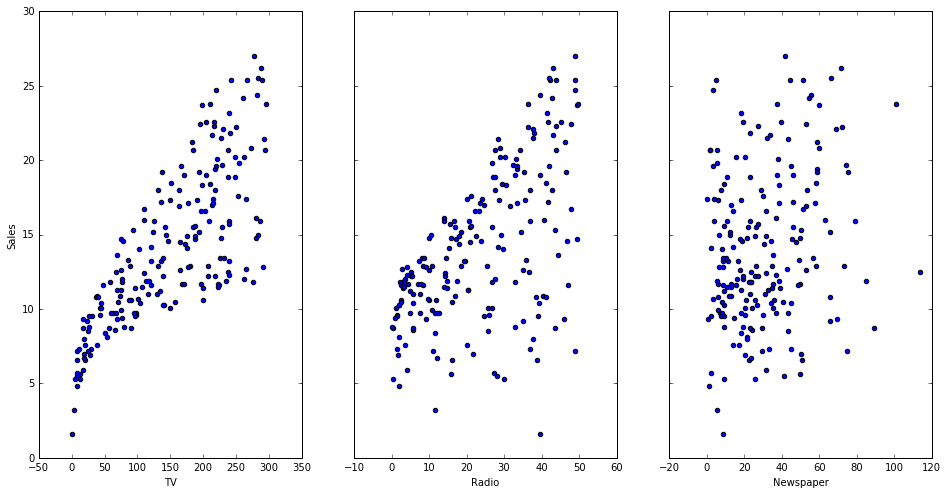

In [14]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [18]:
# Create a new column in the DataFrame called squared_Sales that contains the squared values of the Sales column
data['squared_Sales']=data.Sales**2

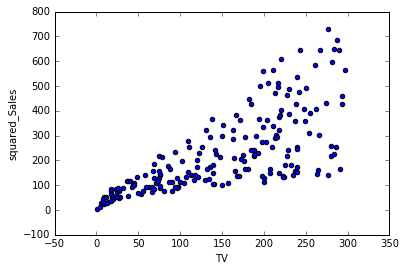

In [19]:
# Plot the relationship of squared_Sales on TV
data.plot(kind='scatter',x='TV',y='squared_Sales')

Scatter Matrix


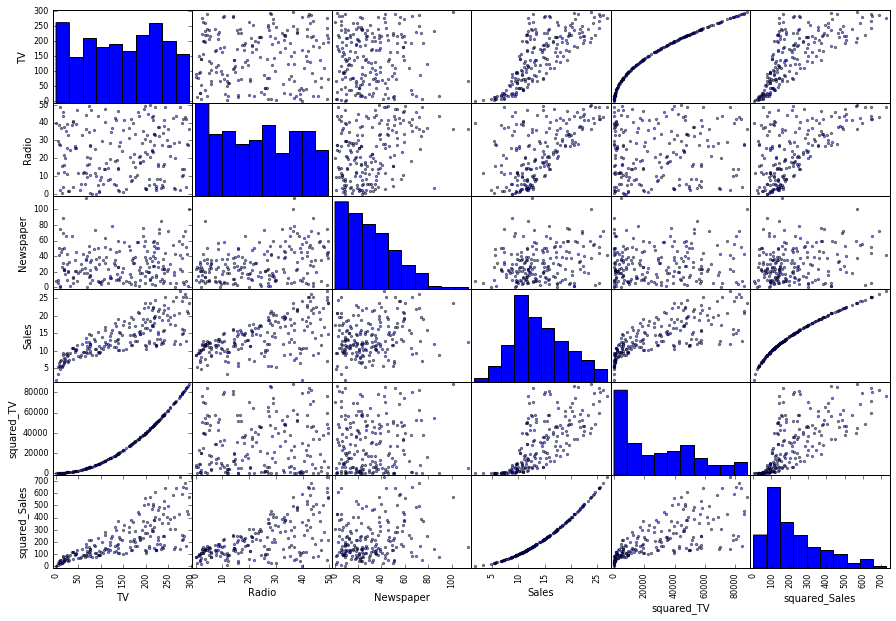

In [23]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, figsize=(15, 10), diagonal='hist')
print 'Scatter Matrix' 

In [ ]:
# Is there a relationship between ads and sales?


In [ ]:
# Is this a causal relationship?


In [ ]:
# What other questions might we want to know about this data?


#### GROUP EXERCISE (join someone at your table)

Let's say we want to evaluate which type of ad is associated with higher sales.

- Draw a basic DAG on your table or whiteboard 
- Think about other variables that may predict sales.
- Be ready to share an example

#### CODEALONG: Hypothesis Testing

##### Libraries

For today's demo, we'll be using Statsmodels for teaching purposes, since it has some nice characteristics for linear modeling.

We will be demostrating hypothesis testing as it relates to linear modeling. We'll dive into how to do linear regression models in later classes.

Statsmodels is a Python library focused on traditional statistics and brings in many features that you would find in R or STATA.

Let's use Statsmodels to estimate the associatione between advertising efforts and sales.

In [34]:
# this is the standard import for statsmodels if you're using "formula notation" (similar to R)

import statsmodels.formula.api as smf
# create a fitted model in one line
#formula notification is the equivalent to writing out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm=smf.ols(formula='Sales~Newspaper',data=data).fit()

#print the full summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 03 Aug 2016   Prob (F-statistic):            0.00115
Time:                        20:33:24   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000        11.126    13.577
Newspaper      0.0547      0.017      3.300      0.001         0.022     0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

The **exposure/predictor** is TV ads, associated with the **outcome**: sales.  

We can measure the strength to demonstrate a strong association.

What other factors may increase sales?  

What other types of ads?


In [ ]:
# print the coefficients


##### Interpreting Model Coefficients

How do we interpret the TV coefficient?

    A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
    Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a decrease in sales, the **coefficient** would be negative.


##### Using the Model for Prediction¶

Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

In [28]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444



Thus, we would predict Sales of 9,409 widgets in that market.

Of course, we can also use Statsmodels to make the prediction:


In [29]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
df=pd.DataFrame({'TV':[50]})
df.head()

,TV
0,50


In [30]:
# use the model to make predictions on a new value
lm.predict(df)

array([ 9.40942557])

#### KNOWLEDGE CHECK 

What is **confounding**? What could we do differently in the following example to avoid these elements?

Let's assume that the TV ads were run in November/December (right before holiday gift season) while the Google ads were run during February & March (when sales are historically low).

If we compare TV and Google Ads but don't take into account seasonality, then we are likely to make the wrong conclusion. In this case, we might assume that Google ads are not as effective at driving sales as tv ads, but this would be an example of bias and confounding.

#### SECTION HIGHLIGHTS

1) The importance of having deep subject area knowledge. You'll develop this over time and it will help you move through your analysis in a logical manner. However, keep in mind that you can show a strong association and still be totally wrong.

2) That a DAG (directed acyclic graph) can be a handy tool for thinking through the logic of your models.

3) The distinction between causation and correlation. In our smoking example, it's relatively obvious that there's a flaw in our logic; however, this won't always be so readily apparent... especially in cutting edge fields where there are many other unknown variables.

4) The importance of good data. Throughout the class we will be working on helping you develop your data intuition, so that you can spot gaps and bias more readily. With this will come a bunch of tools to help you. However, your analysis is only as good as your understanding of the problem and the data

### Introduction to Hypothesis Testing
Objective: Test a hypothesis within a sample case study

You'll remember from last time that we worked on descriptive statistics. How would we tell if there is a difference between our groups? How would we know if this difference was real or if our finding is simply due to chance?

These are the questions we often tackle when we are building out our models in the Refine & Build steps of our data science workflow.

For example, if we are working on sales data, how would we know if there was a difference between the buying patterns of men and women at Acme Inc? Hypothesis testing!

##### Hypothesis testing steps
Generally speaking, you start with a null hypothesis and an alternative hypothesis, which is opposite the null. Then, you check whether the data supports rejecting your null hypothesis or failing to reject the null hypothesis.

Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. Your alternative hypothesis may indeed be true, but you don't necessarily have enough data to show that yet.

This distinction is important to help you avoid overstating your findings. You should only state what your data and analysis can truly represent.

Here is an example of a conventional hypothesis test:

    Null hypothesis: There is no relationship between Gender and Sales.
    Alternative hypothesis: There is a relationship between Gender and Sales

### Validate your findings

##### How do we tell if the association we observed is statistically significant?

Statistical Significance is the likelihood that a result or relationship is caused by something other than mere random chance. Statistical hypothesis testing is traditionally employed to determine if a result is statistically significant or not.

Typically, we use a cut point of 5%. In other words, we say that something is statistically significant if there is a less than 5% chance that our finding was due to chance alone.

When data scientists present results and say we found a significant result- it is almost always using these criteria. Let's dive into them further to understand p-values and confidence intervals.

#### KNOWLEDGE CHECK 
What is the null hypothesis? Why is this important to use?

##### CODEALONG: P-values & CI in the case study
Objective: Discuss biased coefficients and confidence intervals

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [31]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843




Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.


##### Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** - a hypothesis that is the opposite of the null. Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

Note that "failing to reject" the null is **not** the same as "accepting" the null hypothesis. Your alternative hypothesis may indeed be true, but you don't necessarily have enough data to show that yet.

As it relates to model coefficients, here is the conventional hypothesis test:

- **null hypothesis**: There is no relationship between TV ads and Sales (and thus     equals zero)
- **alternative hypothesis**: There is a relationship between TV ads and Sales (and thus     is not equal to zero)

How do we test this hypothesis? We reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**.

Conversely, the **p-value** represents the probability that the coefficient is actually zero:


In [32]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**.

If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. Using 0.05 as the cutoff is a standard convention.

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.

- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.

##### Confidence in our Model and a cultural note
Objective: Think a bit more about bias and variance, maybe something will click, maybe it won't

Remeber how I said **bias** refers to how on target a model is?

We can expand this concept to ask how on target any **estimator** is. An estimator is a rule for calculating a quantity based on data, such as the **sample mean**, **regression coefficients**, or **model predictions**.

- Traditional research tends to focus on model coefficients, individual relationships, and unbiased estimators
- Machine learning focuses on model performance and often uses biased estimators

- Naturally, in traditional research you tend to ask are my coefficients biased? 
- While in ML you tend to ask, "Is my model optimally biased?"

**Why would you use a biased estimator?**

- Unbiasedness guarantees a correct answer at an infinite sample size, but in reality you still have to deal with statistical noise
- Sometimes biased estimators are more reliable at smaller sample sizes or make for easier computation
- In some cases, there is a strong and easily quantifiable relationship between model bias and coefficient bias
- However, coefficients may be biased for various reasons

##### Knowledge Check
    
What does a 95% confidence interval indicate?

[Relevant XKCD](https://xkcd.com/882/)

##### Group exercise (Please get into groups of 3)
Objective: Get comfortable reading outputs and practicing hypothesis testing.

For this exercise, you will look through a variety of analyses and interpret the findings.

You will be presented a series of outputs (similar to the ones we will generate once we start regression) and tables from a published analysis.

For this lab you will be asked to read these outputs and tables and determine if the findings are statically significant or not.

You will also get practice looking at the output and understanding how the model was built (e.g. identifying predictor/exposure vs outcome).

If you have trouble viewing this in your notebook, it's available in the repo: https://github.com/ga-students/DS-DC-14/blob/master/lessons/lesson-04/code/starter-code/lab-starter-code-4.ipynb

### Data output 1

This dataset examines the association between an outcome and generic variables x1, x2, x3 

![Generic Linear Model](assets/images/generic-output.png)

**Question 1.1 X3 has an association with the outcome of -0.2. Is this finding statistically significant?**


**Question 1.2 Which of the variables X1, X2, and X3 have a statistically significant finding?**

**Question 1.3 What does a 95% CI of 0.38-0.866 indicate?**

### Data Output 2
This is a data set of different animals. We measured the brain size and body size of each animale in our data set. We aim to determine if there is an association between the body size and brain size of animals in our dataset.

![body-size](assets/images/body-size.png)

**Question 2.1 What is the outcome in this model?**


**Question 2.2 What is the predictor in this model?**

**Question 2.3 What is the association body and brain size?**

**Question 2.4 Is this relationship statistically significant? How did you decide?**


**Question 2.5 Is this relationship biologically significant? What other information would you need to decide this?**

### Data Set 3: A study about french fries and diabetes¶
Take a look at the abstract

![fry-abstract](assets/images/fry-abstract.png)

### Table 1 - Review Table 1

![fry-table1](assets/images/fry-table1.png)

**Question 3.1 Is there a statistically significant diffence by age among the different levels of fry or potato intake?**


![fry-table1](assets/images/fry-table2.png)

**Question 3.2 What are the numbers in the parentheses?**

**Question 3.3 Is the risk of diabetes statistically significant for women who eat the highest mean servings of potatos (quintile 5) compared to the lowest group (quintile 1)?**

**Question 3.4 Is the risk of diabetes statistically significant for women who eat the second lowest mean servings of potatos (quintile 2) compared to the lowest group (quintile 1)?**

## LAB REVIEW

## CLASS REVIEW
- What are some limitations of association? (What characteristics does association lack that causation has)
- What is the null hypothesis for a regression coefficient?
- Say our coefficient has a p-value of 0.07, what do we conclude about our hypothesis?

## BEFORE NEXT CLASS
- Unit Project 2 DUE Monday: https://github.com/ga-students/DS-DC-14/blob/master/projects/unit-projects/project-2/readme.md

## ADDITIONAL RESOURCES
- This is a dense topic with many particular details
- Chapters 1-7 of Introduction to Econometrics by Stock and Watson
  - Posted in handy-resources by John

## EXIT TICKETS
http://goo.gl/forms/gG5qAw9QljgkHC2q1